# **Deep Learning-Based Segmentation for Neuronal Cell Detection in Fluorescent Microscopy Images**
### Gabriele Pascali, Gonçalo Araújo, João Galvão

---
# Image Segmentation

## 1. What is Image Segmentation?

Image segmentation is a fundamental technique in computer vision and digital image processing that partitions an image into distinct regions based on pixel characteristics such as color, texture, or intensity. Unlike image classification, which assigns a single label to an entire image, segmentation combines classification and localization by identifying not only what is present but also where it appears—outlining object boundaries at the pixel level.

This process is essential for tasks that require detailed understanding of visual content, including:

- Object detection: Identifying and classifying objects within specific regions.
- Region identification: Differentiating areas based on visual features.  
- Advanced image processing: Supporting applications such as medical imaging, autonomous vehicles, and scene understanding.

Segmentation typically begins by converting an image into a set of labeled regions or a segmentation mask. Techniques often rely on detecting abrupt changes in pixel values (edges), which mark boundaries between different regions. By isolating relevant segments, image segmentation enables more efficient and targeted processing, making it a cornerstone of modern visual data interpretation.


![title](image2.jpeg)


---

## 2. Traditional vs. Deep Learning-Based Segmentation

### 🔹 Traditional Methods

Classical segmentation methods rely on basic pixel-level features such as:

- Color
- Brightness
- Contrast
- Intensity

These approaches are **computationally efficient**, require minimal training, and are well-suited for simpler tasks like basic semantic classification.

**Common classical techniques:**

- Thresholding: One of the simplest techniques, where pixels are divided into regions based on a predefined intensity threshold.
  
- Histograms: Analyze the distribution of pixel values to identify clusters (e.g., peaks and valleys), using features like color or intensity. Efficient due to requiring only a single pass through the image.

- Edge detection: Uses filters (e.g., Sobel, Canny) to detect sharp changes in intensity, highlighting object boundaries by computing image gradients along the x and y axes.

- Watershed algorithms: Treats the image as a topographic surface, "flooding" it from minima to form catchment basins, effectively segmenting based on gradient and topology.

- Region-based segmentation: Starts with seed pixels and grows regions by merging adjacent pixels with similar properties.

- Clustering methods: Group pixels into clusters based on similarity in features such as color, intensity, or texture (e.g., k-means, mean-shift).

### 🔹 Deep Learning-Based Methods

Deep learning–based segmentation leverages neural networks—particularly convolutional neural networks (CNNs)—to automatically identify and delineate objects or regions within images. These models learn complex, hierarchical features from large annotated datasets, allowing for highly precise and context-aware segmentation. Applications span diverse domains, including medical imaging, autonomous driving, and remote sensing. Most segmentation networks output a multi-channel (n-channel) binary format, also referred to as a 2D one-hot encoded mask, where each channel corresponds to a specific class.

Segmentation networks typically follow an encoder-decoder architecture:

- The encoder extracts feature representations through convolution and downsampling.

- A bottleneck compresses this representation.

- The decoder reconstructs the spatial structure via upsampling, producing the segmentation mask.

Most segmentation networks output a multi-channel (n-channel) binary format, also referred to as a 2D one-hot encoded mask, where each channel corresponds to a specific class.


### Popular deep learning segmentation models:

- **Fully Convolutional Networks (FCNs)**  
  Pioneered the use of convolutional layers for segmentation without fully connected layers. The decoder upsamples the encoded features to generate pixel-wise predictions.

- **U-Net**  
  Designed for biomedical image segmentation, U-Net added skip connections, which pass feature maps directly from encoder layers to corresponding decoder layers. This mitigates information loss during downsampling and enables more accurate boundary localization.

- **SegNet**
    Introduced a structured encoder-decoder network using pooling indices to guide upsampling, helping retain spatial precision in segmentation masks.

- **Deeplab**  
  Achieved state-of-the-art performance using atrous (dilated) convolutions to expand the receptive field without increasing computation. Its Atrous Spatial Pyramid Pooling (ASPP) captures multi-scale context, enabling robust segmentation across object sizes.

- **Mask R-CNN**  
  Extends Faster R-CNN for instance segmentation by adding a parallel branch to predict segmentation masks alongside object detection.

- **CenterMask2**
  Builds on Mask R-CNN and combines instance segmentation with real-time object detection, introducing a spatial attention-guided mask head for better mask quality with efficient inference

- **Detectron2**
  A modular, flexible PyTorch-based framework developed by Facebook AI Research. It supports various state-of-the-art segmentation models (including Mask R-CNN and CenterMask2) and offers easy extensibility for custom segmentation pipelines.

- **Vision Transformers (ViT)**  
  Replace convolution with self-attention mechanisms to model long-range dependencies. ViT-based segmentation models (e.g., Segmenter, SETR) achieve strong performance by capturing global context more effectively.


### Common Loss Functions in Image Segmentation

Loss functions play a crucial role in training segmentation networks by quantifying the difference between predicted masks and ground truth labels. The choice of loss function affects convergence, class balance, and the final segmentation quality. Below are some of the most widely used loss functions in image segmentation tasks:

---

#### **1. Binary Cross-Entropy (BCE) Loss**

Used in binary (foreground/background) segmentation tasks.

$$
\mathcal{L}_{\text{BCE}} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)\right]
$$

**Where:**

<ul>
  <li>\( y_i \): Ground truth label (0 or 1)</li>
  <li>\( \hat{y}_i \): Predicted probability</li>
  <li>\( N \): Number of pixels</li>
</ul>  

#### **2. Categorical Cross-Entropy (CCE) Loss**
Used in multi-class segmentation, where each pixel belongs to one of multiple classes.

$$
\mathcal{L}_{\text{CCE}} = -\sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \cdot \log(\hat{y}_{i,c})
$$

**Where:**

<ul>
  <li>\( y_{i,c} \): One-hot encoded true label for class \( c \)</li>
  <li>\( \hat{y}_{i,c} \): Predicted probability for class \( c \)</li>
  <li>\( C \): Number of classes</li>
</ul>


#### **3. Dice Loss**
Measures overlap between predicted and ground truth masks, often used in medical imaging.

$$
\mathcal{L}_{\text{Dice}} = 1 - \frac{2 \sum_i y_i \hat{y}_i + \epsilon}{\sum_i y_i + \sum_i \hat{y}_i + \epsilon}
$$

**Where:**

<ul>
  <li>\( \epsilon \): Smoothing constant (to avoid division by zero)</li>
</ul>


#### **4. Jaccard Loss (IoU Loss)**
Related to Dice Loss, but penalizes false positives more heavily.

$$
\mathcal{L}_{\text{IoU}} = 1 - \frac{\sum_i y_i \hat{y}_i}{\sum_i y_i + \sum_i \hat{y}_i - \sum_i y_i \hat{y}_i}
$$


#### **5. Focal Loss**
Designed to handle class imbalance by focusing training on hard-to-classify examples.

$$
\mathcal{L}_{\text{Focal}} = -\alpha (1 - \hat{y}_i)^{\gamma} y_i \log(\hat{y}_i)
$$

**Where:**  
<ul>
  <li>\( \alpha \): Balancing factor</li>
  <li>\( \gamma \): Focusing parameter (e.g., 2.0)</li>
</ul>


#### **6. Tversky Loss**
Generalizes Dice Loss by weighting false positives and false negatives differently.

$$
\mathcal{L}_{\text{Tversky}} = 1 - \frac{\sum_i y_i \hat{y}_i + \epsilon}{\sum_i y_i \hat{y}_i + \alpha \sum_i y_i (1 - \hat{y}_i) + \beta \sum_i (1 - y_i) \hat{y}_i + \epsilon}
$$

**Where:**

<ul>
  <li>\( \alpha, \beta \): Control the penalty for FN and FP</li>
  <li>\( \epsilon \): Smoothing constant</li>
</ul>

#### **7. Combo Loss**
Combines multiple losses (e.g., BCE + Dice) to leverage their strengths.

$$
\mathcal{L}_{\text{Combo}} = \lambda \cdot \mathcal{L}_{\text{BCE}} + (1 - \lambda) \cdot \mathcal{L}_{\text{Dice}}
$$

**Where:**

<ul>
  <li>\( \lambda \): Weight factor to balance both losses</li>
</ul>

---

## 3. Types of Image Segmentation

### a. Semantic Segmentation

Semantic segmentation involves classifying every pixel in an image into a predefined class label. All pixels belonging to a specific class—such as "car," "road," or "sky"—are grouped together, without distinguishing between different instances of the same class.

- Assigns a class label to each pixel.
- Does not differentiate between separate instances of the same object.
- Suitable for labeling both "things" (countable objects) and "stuff" (uncountable regions like grass or sky), but only categorically.

📌 *Example*:  All cars in a street scene are labeled as “car,” regardless of how many or where they are.

⚠️ *Limitation*: In scenes with multiple objects of the same class close together (e.g., a crowd), the output lacks detail about individual instances. Cannot separate overlapping objects of same class.

### b. Instance Segmentation

Instance segmentation takes pixel-level classification further by identifying individual objects within the same class. While semantic segmentation merges all objects of the same class, instance segmentation separates them into unique instances—even if they overlap.

- Distinguishes between individual objects of the same class.
- Prioritizes separating object boundaries, even without always identifying class labels (in certain formulations).
- Focuses on segmenting "things" (countable objects) precisely.
- Provides pixel-perfect masks rather than bounding boxes (as in object detection).

📌 *Example*: Each pedestrian in a crowd or each parked car is segmented as a distinct object, even when overlapping.

⚠️ *Limitation*: Struggles with occlusion, touching objects, and ignores background
                  

### c. Panoptic Segmentation

Panoptic segmentation unifies the goals of both semantic and instance segmentation. It provides a comprehensive view of the scene by labeling each pixel with both a semantic class and, if applicable, an instance ID.

- Assigns: a semantic class to every pixel.
- Assigns an instance ID to each pixel that belongs to a thing (e.g., people, cars).
- Stuff (e.g., road, sky, grass) is labeled by class but not separated into instances.
- Provides a **comprehensive understanding** of the scene.

📌 *Example*:  In a street scene, each person and car is individually segmented and labeled, while the sky and road are categorized as “stuff.”

⚠️ *Limitation*: Combines the computational demands of both semantic and instance segmentation.
                  Overlapping or inconsistent predictions



![title](image.png)


 ## Summary

| Segmentation Type | Focus                           | Handles “Things” | Handles “Stuff” | Instance-aware | Use Case Example          |
|-------------------|----------------------------------|------------------|------------------|----------------|----------------------------|
| Semantic          | Classifying every pixel          | ✅                | ✅                | ❌              | Aerial land classification |
| Instance          | Separating object instances       | ✅                | ❌                | ✅              | Counting parked cars       |
| Panoptic          | Unifying both types              | ✅                | ✅                | ✅              | Urban street analysis      |                 
                  
---

## 4. Types of Semantic Classes

| Type     | Description                                                                  | Examples                |
|----------|------------------------------------------------------------------------------|-------------------------|
| **Things** | Countable objects with defined boundaries and shapes                          | Car, person, tree       |
| **Stuff**  | Uncountable, amorphous regions without clear part-based structure             | Sky, water, grass       |

**Reminder**: Panoptic segmentation isolates both "things" and "stuff" effectively—something neither semantic nor instance segmentation achieves alone.

---

## 5. Applications of Image Segmentation

### 🏥 Medical Imaging
- Tumor detection, organ delineation, MRI and CT interpretation
- Used in diagnostics and surgical planning
- Clinical diagnosis

### 🔬 Biomedical Research
- Cell and tissue analysis
- Longitudinal and high-throughput studies

### 🚗 Autonomous Vehicles
- Detect pedestrians, cars, lanes, and traffic signs
- Crucial for obstacle avoidance and navigation

### 🛰️ Satellite Imaging
- Segment landscapes: forests, urban areas, water bodies
- Land use and environmental monitoring

### 🧠 Smart Cities
- Real-time traffic monitoring
- Surveillance and infrastructure planning

### 🏭 Manufacturing
- Quality control, defect detection, product sorting

### 🌾 Agriculture
- Crop health estimation
- Weed detection and yield forecasting

---
  
## Aims

Based on those applications, this work aims to develop and evaluate deep learning-based image segmentation models to identify and delineate neurons in fluorescent microscopy images accurately. Precise segmentation of neurons is crucial in neuroscience and biomedical research, as it enables quantification and spatial analysis of neuronal populations involved in various biological processes.

By leveraging the Fluorescent Neuronal Cells dataset, which provides high-resolution images and pixel-level ground-truth masks, we aim to address these challenges and contribute to developing robust, generalizable computational tools for neuron detection and counting. Ultimately, this study seeks to support advancements in biomedical imaging, experimental neuroscience, and the broader application of deep learning in life sciences.

---
# Dataset Description

For this study, we use the Fluorescent Neuronal Cells dataset (https://www.kaggle.com/datasets/nbroad/fluorescent-neuronal-cells), which consists of 283 high-resolution (1600x1200 pixels) fluorescence microscopy images of mice brain slices. Each image highlights neurons labeled with a fluorescent marker, appearing as yellow-tinted regions of varying intensity against darker, composite backgrounds.

The dataset includes two main components:

- Original images stored in the all_images/images directory, capturing neuronal structures during a biological experiment.

- Corresponding binary ground-truth masks (in black-and-white) representing pixel-level annotations of stained neurons.

The dataset is well-suited for tasks such as semantic segmentation, object detection, and neuron counting. It provides a biologically relevant benchmark for evaluating segmentation models in a context where traditional computer vision models trained on natural images often underperform.

All data is shared under the Creative Commons Attribution Share Alike 4.0 International License, encouraging both academic and methodological exploration.


In [1]:
import numpy as np 
import pandas as pd  
from PIL import Image  

import os 

# empty lists to store full paths of image and mask files
inputPaths = []
maskPaths = []

# set the paths
images_path = r"C:\Users\gonca\Desktop\LiveCell\all_images"
masks_path = r"C:\Users\gonca\Desktop\LiveCell\all_masks"

# traverse the images directory and collect full paths of all .png image files
for dirname, _, filenames in os.walk(images_path):
    for filename in filenames:
        if filename.endswith(".png"):  # only png are considered
            fullPath = os.path.join(dirname, filename)  # construct full file path
            inputPaths.append(fullPath)  # add the path to the list

# same thing but for masks
for dirname, _, filenames in os.walk(masks_path):
    for filename in filenames:
        if filename.endswith(".png"):  
            fullPath = os.path.join(dirname, filename)  
            maskPaths.append(fullPath)  

## Methodology

### Data Preparation

1. The original images and masks are cut into smaller **400x400 pixel** sections, with at least **100 pixels of overlap** in both x and y directions.  
   - This overlap ensures that cells near the edges are fully included in at least one section.
2. The masks are **resized to 50x50 pixels** to make processing faster.

---

### Data Augmentation

Two types of data augmentation are used to improve model learning. These are gradually introduced during training:

 **1. Random Shapes**
- Ellipses and rounded rectangles are drawn in random positions.
- They are similar in **color and size** to real cells.
- Purpose: helps the model recognize **cell shapes** instead of just reacting to yellow pixel clusters.

  **2. Affine Transformations**
- Random changes applied to the image:
  - Rotation
  - X/Y Scaling
  - Horizontal/Vertical Flipping
  - Skewing

---

### Training Process

Since brain cells make up only about nearly **1%** of all pixels, training is done in two phases to handle the class imbalance:

## Phase 1 – Filtered Data (only images with cells)

- Use only images that contain brain cells.
- This raises the cell pixel percentage to around **2%**.
- Class weights are adjusted but slightly reduced to avoid over-predicting cells.

### Phase 1.1
- **Train for 5 epochs** on the filtered dataset.
- **No augmentation** is applied.

### Phase 1.2
- **Train for 10 more epochs** with the following augmentation:
  - Drawing of random ellipses and rounded rectangles.
- Purpose: to teach the model that **cell shape matters** for predictions.

## Phase 2 – Full Dataset

- Now train on the **entire dataset**, including images with no brain cells.
- Use both augmentation techniques:
  - Random shapes
  - Affine transformations
- Only **5 epochs** are run due to slower training times.

---

### Prediction Strategy

Since the model predicts on small sections of each image, we need to stitch the results back together:

1. **Split** the input image into **400x400 pixel** sections (overlap amount is flexible).
2. **Run** predictions on each section.
3. **Resize** each predicted mask back to 400x400 pixels.
4. **Merge** all predicted masks back into one full-size image:
   - For overlapping areas, take the **minimum pixel value** to avoid overestimating.

# Data Preparation

The raw images and masks are loaded.
For each mask:
  - A flood-fill operation is used to identify connected regions with intensity values greater than **122**.
  - From these regions, the **area, width, and height** of each cell are calculated.

The distribution of cell sizes is then analyzed.
  - This helps choose a good **overlap value** for splitting the images.
  - An overlap of **100 pixels** was selected, since it's larger than most cells.
  - This ensures that even if a cell is near the edge of a sub-image, it will still appear fully in at least one sub-image.

In [3]:
import multiprocessing as mp 

# loads one image and its mask
def LoadImgProc(fileInfo):
    filename = fileInfo[0]  
    imgPath, maskPath = fileInfo[1]  
    img = Image.open(imgPath)  
    mask = Image.open(maskPath).convert('L')  # open the mask and convert to grayscale
    return (filename, img, mask)

# loads all image and mask pairs
def loadImages(imgPathNames, maskPathNames):
    # dictionary of mask paths using the file name as the key
    maskFileDict = {os.path.basename(fullPath): fullPath for fullPath in maskPathNames}
    
    # dictionary that matches each image path with its corresponding mask path
    imgMaskFilePairsDict = {
        os.path.basename(fullPath): (fullPath, maskFileDict[os.path.basename(fullPath)])
        for fullPath in imgPathNames
    }
    
    # load all image-mask pairs (sequentially for now, could be done in parallel)
    imgMaskPairsList = [LoadImgProc(t) for t in imgMaskFilePairsDict.items()]
    
    # Return a dictionary: filename - (image, mask)
    return {filename: (img, mask) for filename, img, mask in imgMaskPairsList}

# Load all the image and mask data into a dictionary
imgMaskPairsRaw = loadImages(inputPaths, maskPaths)

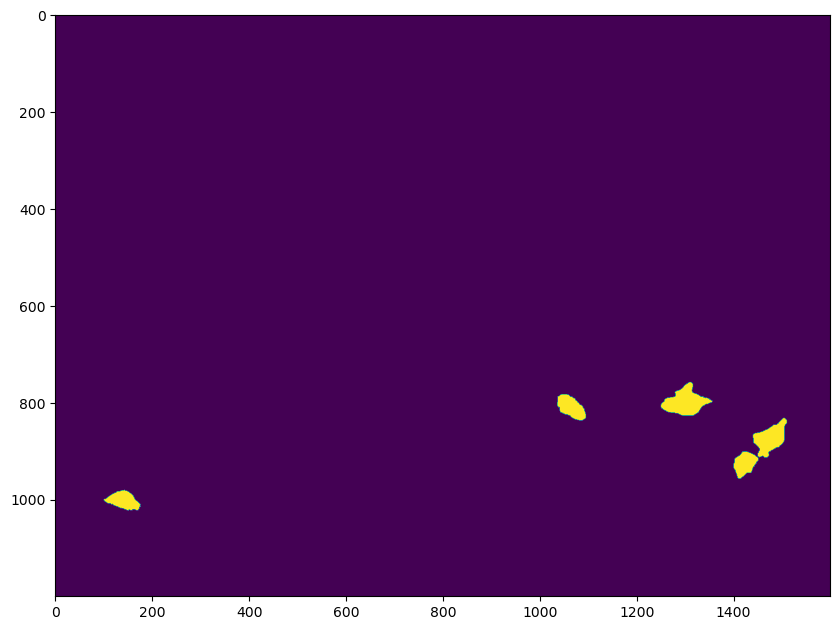

In [5]:
import matplotlib.pyplot as plt 

imgListRaw = [t[0] for _, t in imgMaskPairsRaw.items()]

maskListRaw = [t[1] for _, t in imgMaskPairsRaw.items()]

# plot the first mask to check what it looks like
plt.figure(figsize=(10, 16))  
plt.imshow(maskListRaw[0])    

In [7]:
from collections import namedtuple
from collections import defaultdict

# cell info
CellLocation = namedtuple("CellLocation", ["nPixels", "x", "y", "width", "height"])

# perform BFS to mark all connected pixels as part of the same group
def bfs(r, c, nRows, nCols, traversable, groupAssignments, groupIndex):
    frontier = [(r,c)]
    groupAssignments[r][c] = groupIndex
    while len(frontier) > 0:
        curRow, curCol = frontier.pop() # current cell
        # check 4 neighboring cells (up, down, left, right)
        nextNodes = [
            (curRow + 1, curCol),
            (curRow - 1, curCol),
            (curRow, curCol + 1),
            (curRow, curCol - 1)
        ]
        for nextRow, nextCol in nextNodes:
            # check if the neighbor is inside the bounds
            withinRange = (
                nextRow >= 0 and nextRow < nRows and
                nextCol >= 0 and nextCol < nCols)
            unvisited = (
                withinRange and 
                traversable[nextRow][nextCol] and
                groupAssignments[nextRow][nextCol] == None)
            if withinRange and unvisited:
                frontier.append((nextRow, nextCol))
                groupAssignments[nextRow][nextCol] = groupIndex
    return

# for a given binary mask, find all connected groups of pixels (cells)
def markGroups(maskArr):
    threshold = int(255 * 0.5)
    # booleans list: True = pixel is part of a cell
    isCell = np.greater(maskArr, threshold).tolist() 
    nRows, nCols = maskArr.shape
    group = [[None]*nCols for _ in range(nRows)]
    groupIdx = 0
    # loop through each pixel
    for r in range(nRows):
        for c in range(nCols):
            unvisitedGroup = isCell[r][c] and (group[r][c] == None)
            if unvisitedGroup:
                bfs(r,c, nRows, nCols, isCell, group, groupIdx) 
                groupIdx += 1 # move to the next group
    
    #Get size and bounding
    nGroups = groupIdx
    sizeList = [0] * nGroups
    
    rightList = [0] * nGroups
    leftList = [nCols] * nGroups

    botList = [0] * nGroups
    topList = [nRows] * nGroups
    
    for r in range(nRows):
        for c in range(nCols):
            if group[r][c] != None:
                groupNo = group[r][c]
                sizeList[groupNo] += 1
                
                rightList[groupNo] = max(rightList[groupNo], c)
                leftList[groupNo] = min(leftList[groupNo], c)
                
                botList[groupNo] = max(botList[groupNo], r)
                topList[groupNo] = min(topList[groupNo], r)
                
    # results 
    cellLocList = []
    for groupNo in range(nGroups):
        size = sizeList[groupNo]
        x = leftList[groupNo]
        y = topList[groupNo]
        width = 1 + (rightList[groupNo] - x)
        height = 1 + (botList[groupNo] - y)
        cellLocList.append(CellLocation(size, x, y, width, height))
        
    return cellLocList

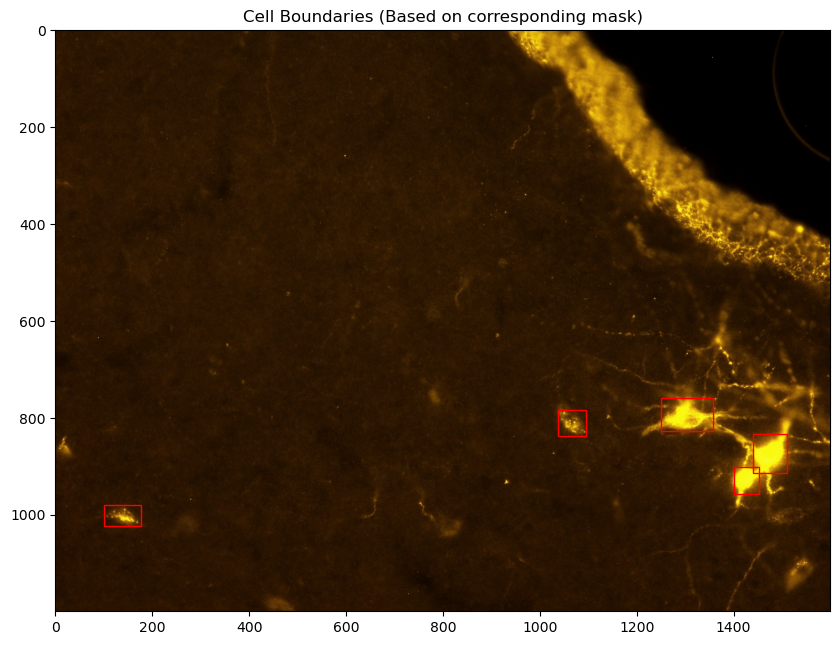

In [9]:
import matplotlib.patches as patches

# cell locations from all masks
cellLocationList = [markGroups(np.array(mask)) for mask in maskListRaw]

imageIdx = 0

plt.figure(figsize=(10, 16))
plt.title("Cell Boundaries (Based on corresponding mask)")
plt.imshow(imgListRaw[imageIdx])

ax = plt.gca()

# red rectangle for each detected cell
for cellLoc in cellLocationList[imageIdx]:
    rect = patches.Rectangle(
        (cellLoc.x, cellLoc.y), cellLoc.width, cellLoc.height,
        linewidth=1, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)

plt.show()

In [11]:
# list of cell locations from all images into a single list
flattenedCellLocations = []

# loop through each image's list of CellLocation objects
for li in cellLocationList:
    flattenedCellLocations.extend(li)

In [13]:
# count the total number of detected cells across all images
nTotalCells = len(flattenedCellLocations)
print(nTotalCells)

# properties of each cell
sizes = [cellLoc.nPixels for cellLoc in flattenedCellLocations]
widths = [cellLoc.width for cellLoc in flattenedCellLocations]
heights = [cellLoc.height for cellLoc in flattenedCellLocations]

2270


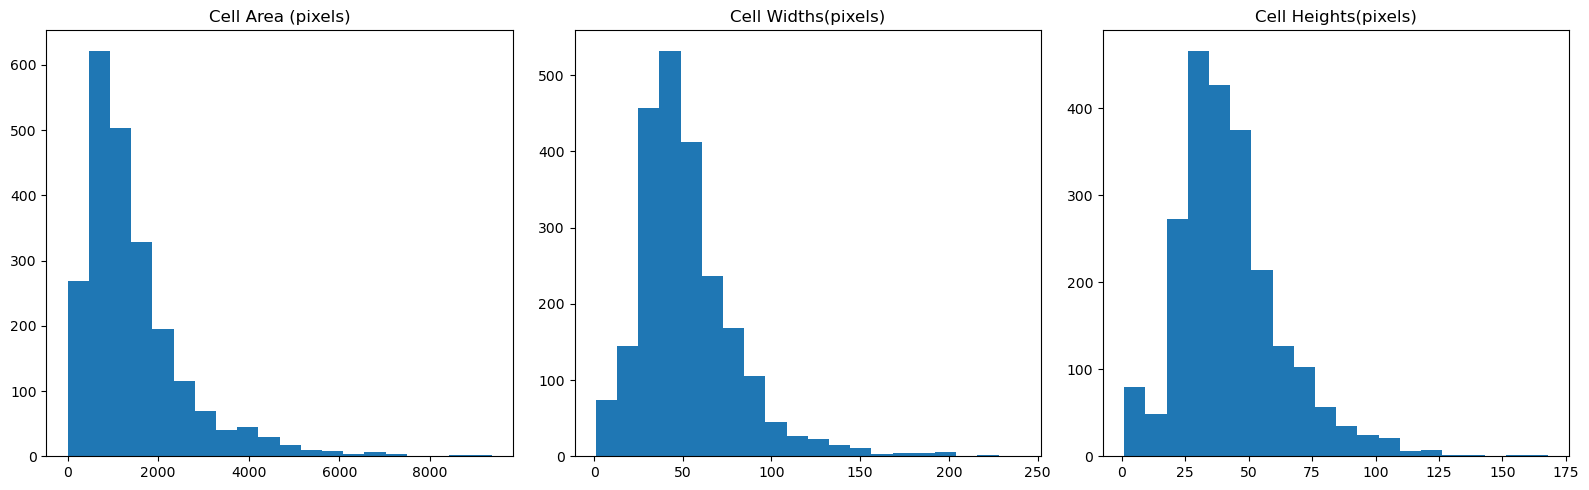

95th Percentile Values for:
 Area:3872.65 pixels
 Width:103.00 pixels
 Height:82.55 pixels


In [15]:
# side-by-side histograms for cell sizes, widths, and heights
fig, ax = plt.subplots(1, 3, figsize=(16,5))

nBins = 20
ax[0].hist(sizes,bins=nBins)
ax[0].set_title('Cell Area (pixels)')

ax[1].hist(widths,bins=nBins)
ax[1].set_title('Cell Widths(pixels)')

ax[2].hist(heights,bins=nBins)
ax[2].set_title('Cell Heights(pixels)')

plt.tight_layout()
plt.show()

percentile = 95

sizePercentile = np.percentile(sizes, percentile)
widthPercentile = np.percentile(widths, percentile)
heightPercentile = np.percentile(heights, percentile)

print("{0}th Percentile Values for:".format(percentile))
print(" Area:{:0.2f} pixels".format(sizePercentile))
print(" Width:{:0.2f} pixels".format(widthPercentile))
print(" Height:{:0.2f} pixels".format(heightPercentile))

In [17]:
# total number of pixels marked as cells across all masks
totalNoOfMarkedPixels = sum(sizes)

# total number of pixels in all masks
overallNoOfPixels = sum((mask.size[0] * mask.size[1] for mask in maskListRaw))

# remaining pixels that are not marked as cells
totalNoOfUnmarkedPixels = overallNoOfPixels - totalNoOfMarkedPixels

markedInv = overallNoOfPixels / totalNoOfMarkedPixels
unmarkedInv = overallNoOfPixels / totalNoOfUnmarkedPixels

# normalization of the weights
normalizationCoeff = 1 / (markedInv + unmarkedInv)
classWeights = {
    0: unmarkedInv * normalizationCoeff, #unmarked pixels
    1: markedInv * normalizationCoeff    #marked pixels
}

print("Percentage of pixels which are neural cells: {0}%".format((totalNoOfMarkedPixels/ overallNoOfPixels) * 100))
print(classWeights)

Percentage of pixels which are neural cells: 0.6066018845700825%
{0: 0.006066018845700824, 1: 0.9939339811542991}


# Subdivision of source images

Each original image of 1600x1200 pixels is split into smaller images of 400x400 pixels. This creates 25 smaller images from each big one. We do this splitting ahead of time to make the data processing faster and to make it easier to separate the training and testing data.

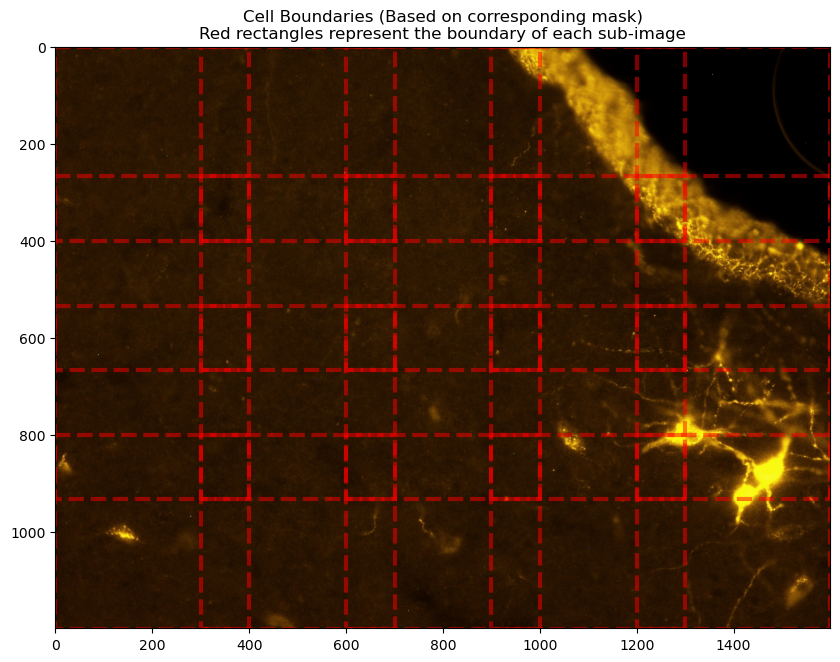

In [19]:
import math

# rectangle structure with x, y, width, and height
Rect = namedtuple("Rect", ["x", "y", "width", "height"])

def EvenlySpacedPartitions(width, height, partitionLength, minOverlap):
    # minimum number of partitions needed to cover a dimension
    def minPartitions(dimLength):
        return math.ceil((dimLength - minOverlap) / (partitionLength - minOverlap))

    # number of rows and columns for partitions
    nRows = minPartitions(height)
    nCols = minPartitions(width)

    # ensuring partitions overlap by at least minOverlap
    def getPartitionStartingPositions(dimLength, nPartitions):
        overlap = (dimLength - nPartitions * partitionLength) / (1- nPartitions)
        advance = partitionLength - overlap
        return [advance * i for i in range(nPartitions)]

    # starting positions for rows and columns
    rowPositions = getPartitionStartingPositions(height, nRows)
    colPositions = getPartitionStartingPositions(width, nCols)
    partitions = []

     # rectangles for each sub-image partition based on starting positions
    for colStart in colPositions: #x
        for rowStart in rowPositions: #y
            partitions.append(Rect(colStart, rowStart, partitionLength, partitionLength))
    return partitions

imageIdx = 0;

plt.figure(figsize=(10,16))

plt.title("Cell Boundaries (Based on corresponding mask)\nRed rectangles represent the boundary of each sub-image")
plt.imshow(imgListRaw[imageIdx])

# image dimensions
width, height  = imgListRaw[imageIdx].size

# generate overlapping partitions of size 400x400 with minimum 100 pixels overlap
partitions = EvenlySpacedPartitions(width, height, 400, 100)

ax = plt.gca();

# rectangles showing each sub-image partition on the image
for partition in partitions:
    rect = patches.Rectangle((partition.x, partition.y), partition.width, partition.height, linewidth=3, edgecolor='r', alpha= 0.5, linestyle="--", facecolor='none')
    ax.add_patch(rect)

plt.show()

In [22]:
# define a structure to hold a cropped image, its corresponding mask, and the source rectangle
CroppedImage = namedtuple("CroppedImage", ["image", "mask", "sourceRect"])

def CropImage(pilImage, pilMask, partitions):
    croppedImages = []
    for partition in partitions:
        # crop box coordinates (left, upper, right, lower)
        top, bot = (partition.y, partition.y + partition.height)
        left, right = (partition.x, partition.x + partition.width)

        # crop the image and the mask using the bounding box
        croppedImg = pilImage.crop((left, top, right, bot))
        croppedMask = pilMask.crop((left, top, right, bot))
        croppedImages.append(CroppedImage(croppedImg, croppedMask, partition))
    return croppedImages

def GetAllPartitions(pilImageList, partitionSize, minOverlap):
    partitionList = []
    for img in pilImageList:
        width, height = img.size
        # overlapping partitions for the current image
        partitions = EvenlySpacedPartitions(width, height, partitionSize, minOverlap)
        partitionList.append(partitions)
    return partitionList

# partition rectangles for all images with 400x400 patches and at least 100 pixels overlap
partitionList = GetAllPartitions(imgListRaw, 400, 100)

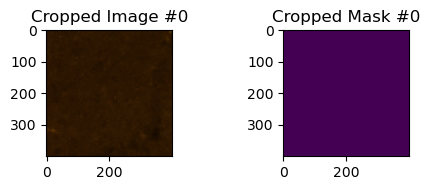

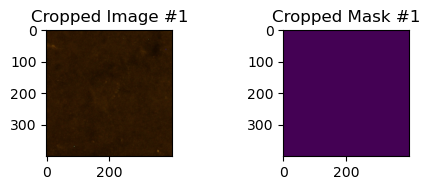

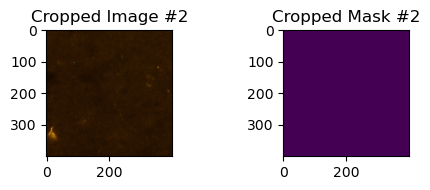

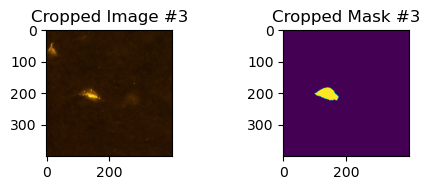

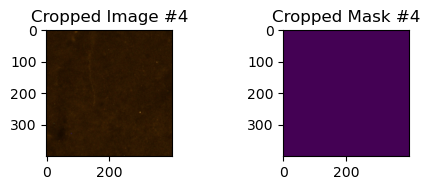

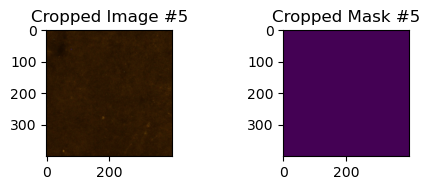

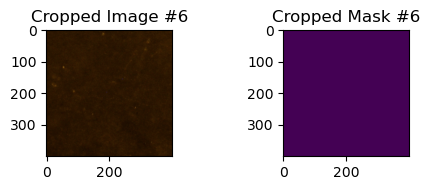

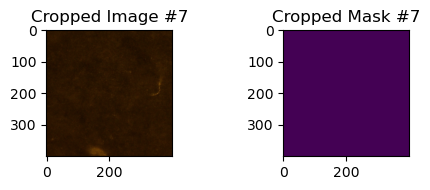

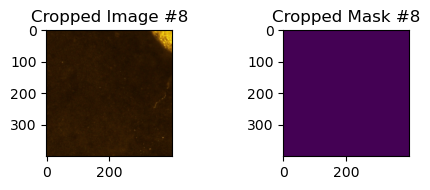

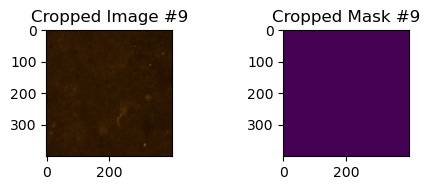

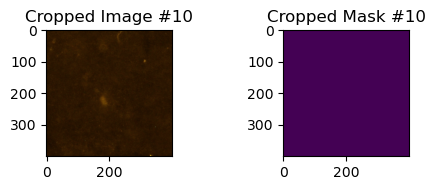

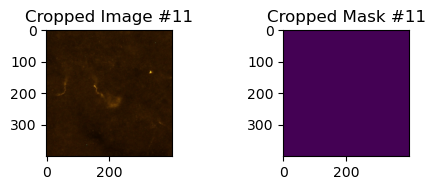

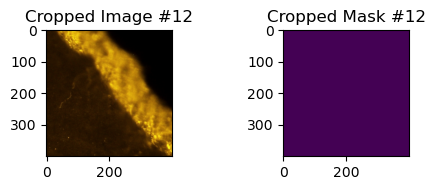

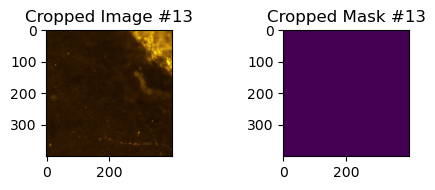

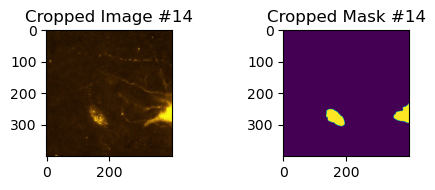

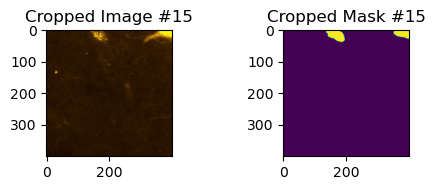

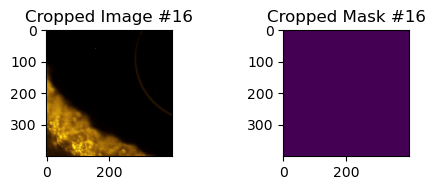

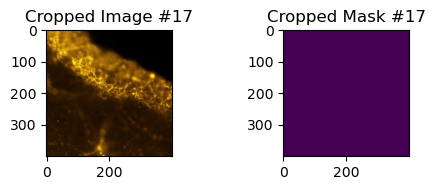

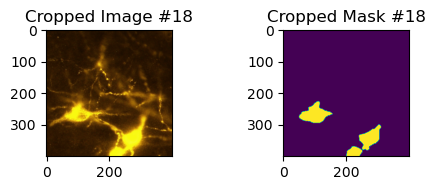

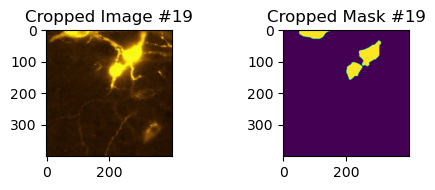

In [24]:
# crop the first image and its mask
sampleCrop = CropImage(imgListRaw[0], maskListRaw[0], partitionList[0])

# loop through each cropped image-mask pair and display them side-by-side
for idx, croppedImagePair in enumerate(sampleCrop):
    fig, ax = plt.subplots(1, 2, figsize=(5,2))

    ax[0].imshow(croppedImagePair.image)
    ax[0].set_title('Cropped Image #{0}'.format(idx))
    
    ax[1].imshow(croppedImagePair.mask)
    ax[1].set_title('Cropped Mask #{0}'.format(idx))
    
    plt.tight_layout()
    plt.show()

# Data Augmentation: Random Shapes

Using the sizes of cells found earlier, ellipses and rounded rectangles (with colors like the marked neurons) are randomly drawn on each smaller image without changing the mask. These added shapes help the neural network understand that shape is an important feature for making predictions.

**Notes:** A more precise way to create similar colors would be to analyze the colors of the marked neurons using a statistical method such as Gaussian Mixture. But instead, we chose to create RGB colors by carefully guessing two colors from the first image. To focus more on shape rather than color, the neural network could also be trained using black and white images.

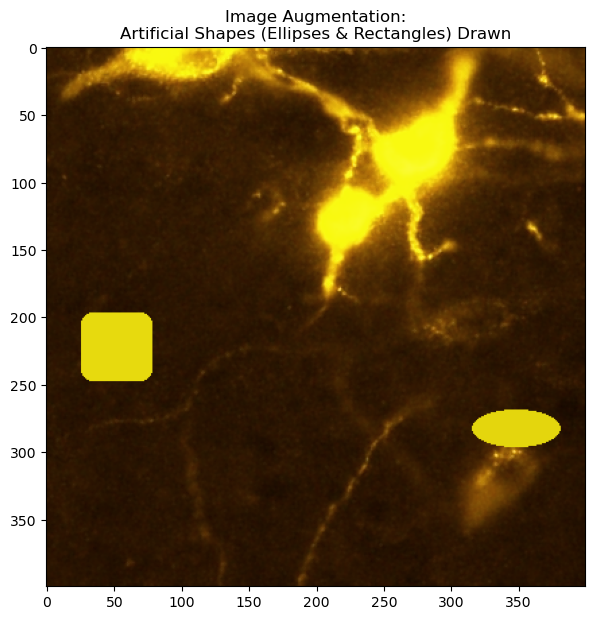

In [29]:
from PIL import ImageDraw
from enum import Enum
import random

# define a simple RGB color structure
TColour = namedtuple("TColour", ["r", "g", "b"])

# sample colors observed in actual cell regions
darkYellow = TColour(101, 61, 6)
brightYellow = TColour(247, 237, 15)

# to interpolate between two RGB colors
def lerpColours(colour1, colour2, frac):
    r = colour1.r * (1 - frac) + colour2.r * frac
    g = colour1.g * (1 - frac) + colour2.g * frac
    b = colour1.b * (1 - frac) + colour2.b * frac
    return TColour(int(r),int(g),int(b))

# shape types: Ellipse or Rounded Rectangle
class ENShape(Enum):
    Ellipse = 0
    Rect = 1

# draw a randomly-sized and randomly-positioned shape (ellipse or rounded rect) on the image
def DrawRandomEllipse(img, shape = ENShape.Ellipse):
    imgWidth, imgHeight = img.size

    # random center position within image bounds
    centreX, centreY = (random.uniform(0, imgWidth), random.uniform(0, imgHeight))

     # random size, inspired by the distribution of real cell sizes
    shapeWidth, shapeHeight = (random.uniform(25, 75), random.uniform(25, 75)) 

    # bounding box from center and size
    boundingBox = (
        int(centreX - shapeWidth * 0.5),
        int(centreY - shapeHeight * 0.5),
        int(centreX + shapeWidth * 0.5), 
        int(centreY + shapeHeight * 0.5)
    )
    
    fillColour = lerpColours(darkYellow, brightYellow, random.uniform(0, 1))
    
    # draw the selected shape on the image
    gc = ImageDraw.Draw(img)
    if shape == ENShape.Ellipse:
        gc.ellipse(boundingBox, fill=fillColour, outline=None, width=1)
    elif shape == ENShape.Rect:
        rad = int(random.uniform(1, min(shapeWidth, shapeHeight) * 0.3))
        gc.rounded_rectangle(boundingBox, radius=rad, fill=fillColour, outline=None, width=1)

# last cropped image and copy it for augmentation
sampleImage = sampleCrop[-1].image.copy()

# synthetic ellipse and a synthetic rounded rectangle on it
DrawRandomEllipse(sampleImage, ENShape.Ellipse)
DrawRandomEllipse(sampleImage, ENShape.Rect)

# result with the drawn synthetic shapes
plt.figure(figsize=(7,7))
plt.title("Image Augmentation:\nArtificial Shapes (Ellipses & Rectangles) Drawn")
plt.imshow(sampleImage)

# Data Augmentation: Affine Transformations

Affine transformations are a useful way to make basic changes to an image, such as:

- Moving the image up, down, left, or right (translation)
- Stretching or shrinking the image along the X or Y axis (scaling)
- Rotating the image around any point (by combining rotation with translation)
- Slanting the image to make it look like a trapezoid (skewing)
- Flipping the image horizontally or vertically (done by using negative scaling)

All these changes can be combined into a single 3x3 matrix. To apply multiple transformations, we multiply matrices together, one for each operation (like rotation or scaling). The order of multiplication matters and may need to be reversed depending on how the matrices are set up (row-major vs. column-major).

These transformations are applied to both the image and its mask so they stay matched.

Below is an example of how to do affine transformations using PIL (Python Imaging Library), although the final version used TensorFlow's affine transformation instead.

**Note:** TensorFlow’s method is easier to use but has some limitations. For example, it always rotates around the center and doesn’t allow you to change the pivot point. It also only fills empty areas left by the transformation with a single solid color. Lastly, if your data pipeline involves converting images from PIL to NumPy arrays, TensorFlow doesn’t give a speed advantage, since both still run on the CPU.

In [31]:
# translation by x, y
def TranslateXForm(x,y):
    return np.array(
        [[1,0,x],
         [0,1,y],
         [0,0,1]]
    );

# rotation by degrees
def RotateXForm(deg):
    rad = math.radians(deg)
    return np.array(
        [[math.cos(rad),-math.sin(rad),0],
         [math.sin(rad), math.cos(rad),0],
         [0,0,1]]
    );

# shearing along x and y axes
def ShearXForm(cx, cy):
    return np.array(
        [[1,cx,0],
         [cy,1,0],
         [0,0,1]]
    );

# scaling along x and y axes
def ScaleXForm(xScale, yScale):
    return np.array(
        [[xScale,0,0],
         [0,yScale,0],
         [0,0,1]]
    );

# random combination of affine transformations
def GetRandomImageXForm(imgWidth, imgHeight):
    xform = np.identity(3)

    # translate origin to the center of the image
    xform = np.matmul(TranslateXForm(imgWidth * -0.5, imgHeight * -0.5), xform) 
    
    # apply random shear
    xform = np.matmul(ShearXForm(random.uniform(0, 0.20), random.uniform(0, 0.20)), xform)
    
    # apply random rotation
    xform = np.matmul(RotateXForm(random.uniform(0, 360)), xform)
    
    # apply random scaling
    xform = np.matmul(xform, ScaleXForm(random.uniform(0.8, 1.5), random.uniform(0.8, 1.5)))
    
   # apply random horizontal and vertical flipping
    yFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
    xFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
    xform = np.matmul(ScaleXForm(xFlipCoeff, yFlipCoeff), xform)
    
    xform = np.matmul(TranslateXForm(imgWidth * 0.5, imgHeight * 0.5), xform) #Shift back to 0,0 as top left origin
    return xform

# colors for augmented images
imgBgColour1 = TColour(20, 8, 0)
imgBgColour2 = TColour(49, 25, 1)

# using PIL
def ApplyAffineXForm(image, xform, bgColour):
    invXForm = np.linalg.inv(xform)
    unpackedXForm = (*invXForm[0],*invXForm[1])  # flatten the first two rows
    
    xformedImg = image.transform(
        image.size, 
        Image.AFFINE, 
        data=unpackedXForm, 
        resample=Image.BILINEAR,
        fillcolor=bgColour)
    return xformedImg

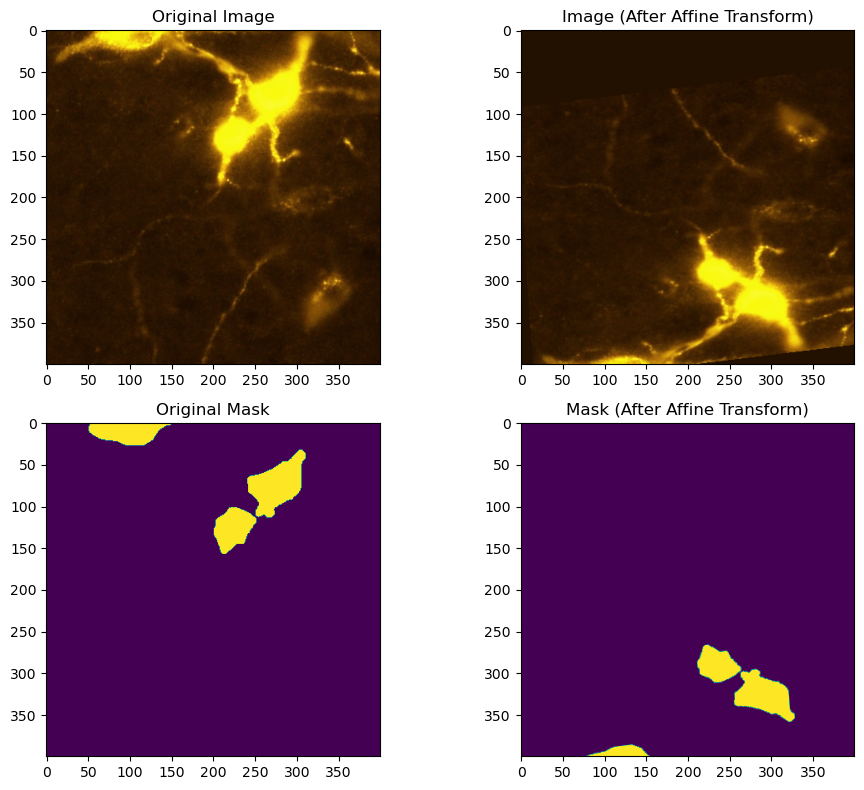

In [33]:
# sample image and its corresponding mask from the cropped dataset
sampleImage = sampleCrop[-1].image
sampleMask = sampleCrop[-1].mask

# random affine transformation matrix based on image size
augmentingXForm = GetRandomImageXForm(*sampleImage.size)

# random background color
bgColour = lerpColours(imgBgColour1, imgBgColour2, random.uniform(0, 1))

xformedImg = ApplyAffineXForm(sampleImage,augmentingXForm, bgColour)
xformedMask = ApplyAffineXForm(sampleMask,augmentingXForm, 0)

# display the original and transformed image-mask pairs
fig, ax = plt.subplots(2, 2, figsize=(10,8))

ax[0,0].imshow(sampleImage)
ax[0,0].set_title('Original Image')

ax[0,1].imshow(xformedImg)
ax[0,1].set_title('Image (After Affine Transform)')

ax[1,0].imshow(sampleMask)
ax[1,0].set_title('Original Mask')

ax[1,1].imshow(xformedMask)
ax[1,1].set_title('Mask (After Affine Transform)')

plt.tight_layout()
plt.show()

In [40]:
partitionedImagesSet = [CropImage(img, mask, partitionInfo) for img, mask, partitionInfo in zip(imgListRaw, maskListRaw, partitionList)]

In [42]:
flattenedImages = []
flattenedMasks = []
for imageMaskPairList in partitionedImagesSet:
    for imageMaskPair in imageMaskPairList:
        flattenedImages.append(imageMaskPair.image)
        flattenedMasks.append(imageMaskPair.mask)

In [44]:
print(len(flattenedImages))

5660


# Data Pipeline

A sequence-based data generator is used here because the augmentation methods can create many different versions of each image. The training data is shuffled after every epoch.

In [47]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import apply_affine_transform

subImgSize = 400
finalMaskSize = 50


# draws a random number of ellipses and rectangles directly on the input image.
def drawRandomShape(pilImage):
    nEllipses = random.randint(0, 2)
    for _ in range(nEllipses):
        DrawRandomEllipse(pilImage, ENShape.Ellipse)
    nRects = random.randint(0, 2)        
    for _ in range(nRects):
        DrawRandomEllipse(pilImage, ENShape.Rect)
    return pilImage

class ImageSequence(Sequence):

    def __init__(self, x_set, y_set, batch_size, mask_final_dim): 
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.shuffleIndices()
        self.mask_dim = (mask_final_dim, mask_final_dim) #Used to downscale the mask
        self.bDrawShapes = False
        self.bAffineTransform = False
        
     # randomize sample order for each epoch
    def shuffleIndices(self):
        nSamples = len(self.x)
        indices = np.arange(nSamples)
        np.random.shuffle(indices)
        self.indices = indices
    
    def on_epoch_end(self):
        self.shuffleIndices()
        
    def enableFeatures(self, bDrawShapes, bAffineTransform):
        self.bDrawShapes = bDrawShapes
        self.bAffineTransform = bAffineTransform

    # returns total number of batches per epoch
    def __len__(self):
        return math.floor(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        startingIdx = idx * self.batch_size
        endingIdx = (idx + 1) * self.batch_size
        selectedIndices = self.indices[startingIdx:endingIdx]
        
        splitImages = [self.x[idx] for idx in selectedIndices]
        splitMasks = [self.y[idx] for idx in selectedIndices]
        
        imgWithRandomShapes = [
            drawRandomShape(img.copy()) if self.bDrawShapes else img 
            for img in splitImages]

         # downscale masks to target size
        masksDownscaled = [tMask.resize(self.mask_dim, Image.NEAREST ) for tMask in splitMasks]

        # convert images and masks to NumPy arrays 
        x_np = [np.array(img) for img in imgWithRandomShapes]
        y_np = [np.array(img) for img in masksDownscaled]
        
        x_augmented = []
        y_augmented = []
        
        for x, y in zip(x_np, y_np):
            rotation = random.uniform(0, 360)
            shear = random.uniform(-10, 10)
            yFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
            xFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
            xScale = random.uniform(0.8, 1.5) * xFlipCoeff
            yScale = random.uniform(0.8, 1.5) * yFlipCoeff
            
            # random grayscale background fill for augmented image
            bgColor = random.uniform(0,50) 
           
            x_aug = None
            if self.bAffineTransform:
                x_aug = apply_affine_transform(x, theta=rotation, shear=shear, zx=xScale, zy=yScale, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=bgColor, order=1)
            else:
                x_aug = x
                
            original_y_shape = y.shape
            y_reshaped = np.reshape(y, (*original_y_shape, 1))
            y_aug = None
            if self.bAffineTransform:
                y_aug = apply_affine_transform(y_reshaped, theta=rotation, shear=shear, zx=xScale, zy=yScale, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=0.0, order=1)
            else:
                y_aug = y_reshaped
                
            y_aug_reshaped = np.reshape(y_aug, original_y_shape)
            x_augmented.append(x_aug)
            y_augmented.append(y_aug_reshaped)
            
        return (np.array(x_augmented), np.array(y_augmented) / 255)

In [59]:
from sklearn.model_selection import train_test_split

# split off 80% train, 20% temp
img_train, img_temp, mask_train, mask_temp = train_test_split(flattenedImages, flattenedMasks, test_size=0.2, random_state=0xDEADBEEF)

# split temp 50/50 to get 10% val and 10% test
img_val, img_test, mask_val, mask_test = train_test_split(img_temp, mask_temp, test_size=0.5, random_state=0xDEADBEEF)

print(f"Train: {len(img_train)} images")
print(f"Validation: {len(img_val)} images")
print(f"Test: {len(img_test)} images")

Train: 4528 images
Validation: 566 images
Test: 566 images


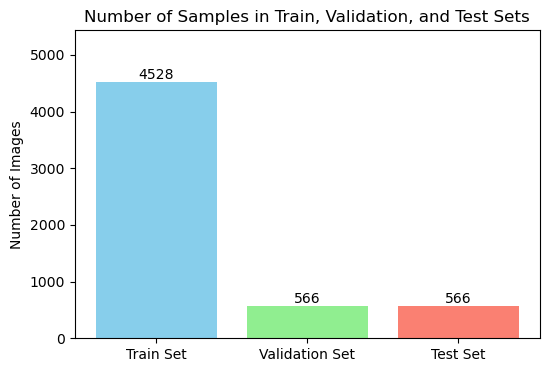

In [61]:
import matplotlib.pyplot as plt

# counts of training, validation, and testing samples
counts = [len(img_train), len(img_val), len(img_test)]
labels = ['Train Set', 'Validation Set', 'Test Set']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Number of Samples in Train, Validation, and Test Sets')
plt.ylabel('Number of Images')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height), ha='center', va='bottom')

plt.ylim(0, max(counts)*1.2) 
plt.show()

# Training Set Filtering

To reduce the problem of class imbalance, the training set is first filtered to keep only the smaller images that actually contain neurons. This raises the percentage of neuron pixels from 0.6% in the full dataset to 2% in the filtered set. The filtering is done by checking if the mask for each image has at least one pixel that is not zero.

In [64]:
# filter out those within the training set that actually have cells

trainSetWithCells = [(img, mask) for img, mask in 
                     zip(img_train, mask_train) 
                     if (np.sum(np.array(mask)) > 255 * 5)]
img_train_with_cells, mask_train_with_cells = zip(*trainSetWithCells) 

# count number of background (unmarked) pixels: pixels with intensity ≤ 122
nUnmarkedPixels = sum([np.sum(np.array(mask) <= 122) for mask in mask_train_with_cells])

# count number of cell (marked) pixels: pixels with intensity > 122
nMarkedPixels = sum([np.sum(np.array(mask) > 122) for mask in mask_train_with_cells])

# total number of pixels across all masks
totalPixels = nMarkedPixels + nUnmarkedPixels

# inverse frequency for each class: more weight for rarer class
invMarked = totalPixels / nMarkedPixels
invUnmarked = totalPixels / nUnmarkedPixels

# normalize the weights so they sum to 1
normalizingCoeff = 1 / (invMarked + invUnmarked)

lossWeights = [invUnmarked * normalizingCoeff, invMarked  * normalizingCoeff]

print(len(img_train_with_cells))
print("Unmarked: {0}, marked {1}".format(nUnmarkedPixels, nMarkedPixels))
print("Percentage of pixels which are neural cells (filtered training set): {0}%".format((nMarkedPixels/ totalPixels) * 100))
print(lossWeights)

1491
Unmarked: 233833043, marked 4726957
Percentage of pixels which are neural cells (filtered training set): 1.9814541415157612%
[0.019814541415157615, 0.9801854585848424]


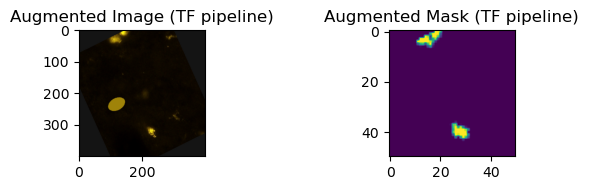

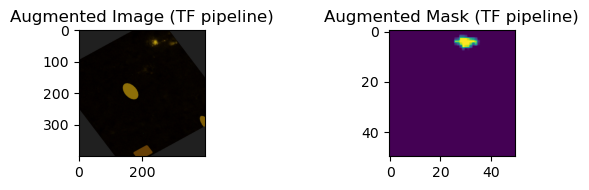

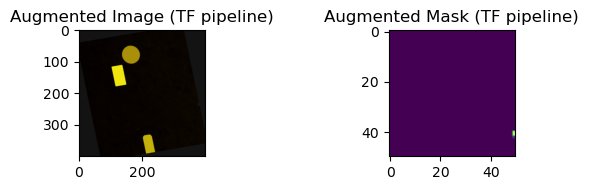

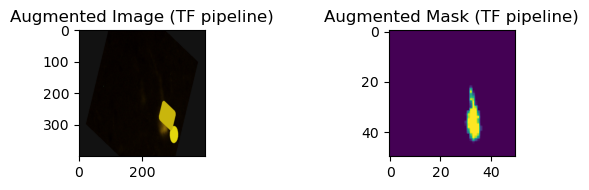

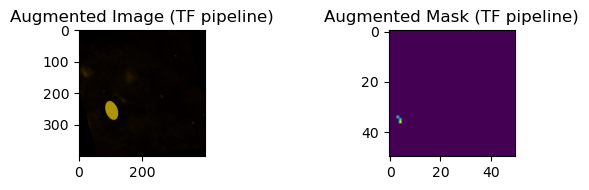

In [66]:
batch_size = 5

# data generator using images and masks with cells
generator = ImageSequence(img_train_with_cells, mask_train_with_cells, batch_size, finalMaskSize)

# data augmentation features
generator.enableFeatures(True, True)

# first batch of images and masks
images, masks = generator.__getitem__(0)

# image and its corresponding mask
for img, mask in zip(images, masks):
    fig, ax = plt.subplots(1, 2, figsize=(7,2))

    ax[0].imshow(img)
    ax[0].set_title('Augmented Image (TF pipeline)')
    
    ax[1].imshow(mask)
    ax[1].set_title('Augmented Mask (TF pipeline)')
    
    plt.tight_layout()
    plt.show()

In [92]:
# Filter for Validation and Test images

valSetWithCells = [(img, mask) for img, mask in zip(img_val, mask_val) if (np.sum(np.array(mask)) > 255 * 5)]
if valSetWithCells:
    img_val_with_cells, mask_val_with_cells = zip(*valSetWithCells)
else:
    img_val_with_cells, mask_val_with_cells = [], []

# Filter test set for images with cells
testSetWithCells = [(img, mask) for img, mask in zip(img_test, mask_test) if (np.sum(np.array(mask)) > 255 * 5)]
if testSetWithCells:
    img_test_with_cells, mask_test_with_cells = zip(*testSetWithCells)
else:
    img_test_with_cells, mask_test_with_cells = [], []

print(f"Training images with cells: {len(img_train_with_cells)}")
print(f"Validation images with cells: {len(img_val_with_cells)}")
print(f"Test images with cells: {len(img_test_with_cells)}")

Training images with cells: 1491
Validation images with cells: 181
Test images with cells: 199


In [94]:
batch_size = 5

# Training generator
train_generator = ImageSequence(img_train_with_cells, mask_train_with_cells, batch_size, finalMaskSize)
train_generator.enableFeatures(True, True)  # data augmentation on training

# Validation generator (usually no augmentation)
val_generator = ImageSequence(img_val_with_cells, mask_val_with_cells, batch_size, finalMaskSize)
val_generator.enableFeatures(False, False)

# Optionally, test generator if needed
test_generator = ImageSequence(img_test_with_cells, mask_test_with_cells, batch_size, finalMaskSize)
test_generator.enableFeatures(False, False)

# CNN implementation

This model uses a straightforward architecture with five convolutional layers that gradually reduce the image size. Unlike many advanced image segmentation networks, it doesn’t follow a downsampling-then-upsampling (encoder-decoder) structure, as a lower-resolution output mask is sufficient for the task.

A custom cross-entropy loss function is used, where the weight of the neuron class is reduced by a factor of 3 to prevent the model from over-predicting neuron regions, especially the yellow-highlighted areas.

Given the strong class imbalance in the dataset, the primary evaluation metrics are precision and recall for neuron cell detection, rather than overall accuracy.

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

keras.backend.clear_session()

# loss function from https://stackoverflow.com/questions/46009619/keras-weighted-binary-crossentropy
def weighted_binary_crossentropy(zero_weight, one_weight):
    def weighted_binary_crossentropy(y_true, y_pred):
        b_ce = keras.backend.binary_crossentropy(y_true, y_pred)
        # weighted calc
        weight_vector = y_true * one_weight + (1 - y_true) * zero_weight
        weighted_b_ce = weight_vector * b_ce
        return keras.backend.mean(weighted_b_ce)

    return weighted_binary_crossentropy

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(subImgSize, subImgSize, 3)),
        
        layers.Lambda(lambda x : x / 255),
        layers.Conv2D(196, 5, strides=(2,2), activation='relu'),
        layers.MaxPooling2D(2),
                
        layers.Conv2D(256, 5,  activation='relu'),
        layers.MaxPooling2D(2),
        
        layers.Conv2D(512, 3, activation='relu'),   
        layers.Conv2D(512, 1, activation='relu'),

        
        layers.Conv2DTranspose(1,finalMaskSize - 44,activation="sigmoid")
    ]
)

# adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

# compile the model with the custom loss
model.compile(optimizer=opt, loss = weighted_binary_crossentropy(lossWeights[0], lossWeights[1] * 0.33), metrics = ['acc'])
model.summary()

C:\Users\gonca\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 196)  │        14,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 196)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 95, 95, 256)    │     1,254,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 512)    │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 50, 50, 1)      │        18,433 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730,801 (10.42 MB)

 Trainable params: 2,730,801 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

# Training - \[Phase 1.1\]

The model is trained for 5 epochs on the filtered training set without any data augmentation. At this stage, the CNN tends to produce false positives, marking any area with even a slight yellow tint as a neuron.

In [104]:
# with the filtered dataset
batch_size = 50

# data generator for training
generator = ImageSequence(img_train_with_cells, mask_train_with_cells, batch_size, finalMaskSize)

# train
history = model.fit(
    x=generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 559s 19s/step - acc: 0.9639 - loss: 0.0030 - val_acc: 0.9683 - val_loss: 0.0027
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 544s 19s/step - acc: 0.9702 - loss: 0.0026 - val_acc: 0.9814 - val_loss: 0.0033
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 537s 19s/step - acc: 0.9712 - loss: 0.0027 - val_acc: 0.9759 - val_loss: 0.0025
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 547s 19s/step - acc: 0.9692 - loss: 0.0027 - val_acc: 0.9752 - val_loss: 0.0025
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 551s 19s/step - acc: 0.9716 - loss: 0.0025 - val_acc: 0.9717 - val_loss: 0.0025


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


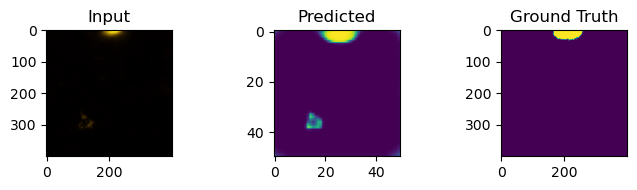

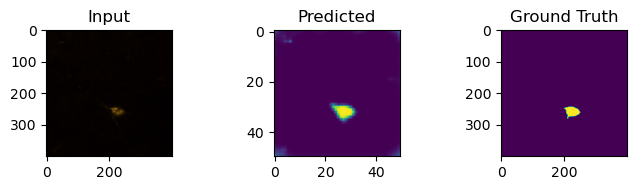

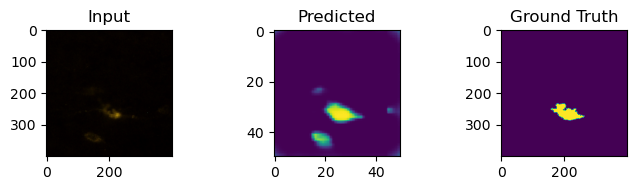

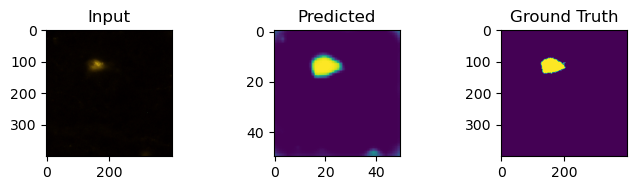

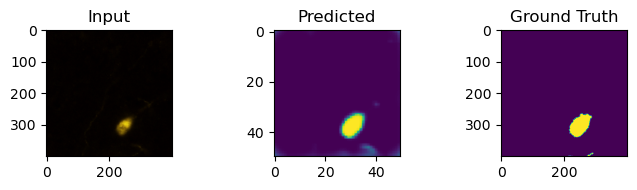

In [108]:
# with training data
def previewResults():
    testCases = np.array([np.array(img) for img in img_train_with_cells[:5]])
    testGroundTruth = mask_train_with_cells[:5]
    predictions = model.predict(testCases)

    for img, pred, actual in zip(testCases, predictions, testGroundTruth):
        fig, ax = plt.subplots(1, 3, figsize=(7,2))

        ax[0].imshow(img)
        ax[0].set_title('Input')
    
        ax[1].imshow(pred)
        ax[1].set_title('Predicted')

        ax[2].imshow(actual)
        ax[2].set_title('Ground Truth')

        plt.tight_layout()
        plt.show()

previewResults()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


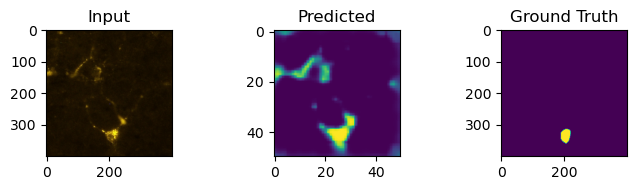

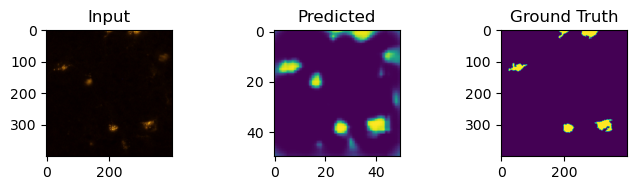

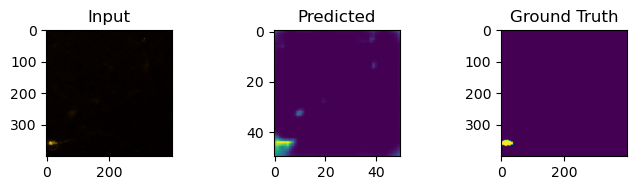

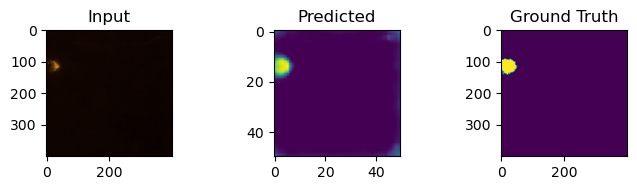

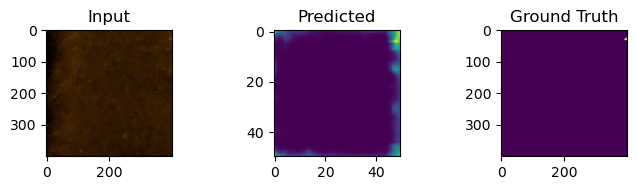

In [110]:
# with validation data

def previewResults():
    testCases = np.array([np.array(img) for img in img_val_with_cells[:5]])
    testGroundTruth = mask_val_with_cells[:5]
    predictions = model.predict(testCases)

    for img, pred, actual in zip(testCases, predictions, testGroundTruth):
        fig, ax = plt.subplots(1, 3, figsize=(7,2))

        ax[0].imshow(img)
        ax[0].set_title('Input')
    
        ax[1].imshow(pred)
        ax[1].set_title('Predicted')

        ax[2].imshow(actual)
        ax[2].set_title('Ground Truth')

        plt.tight_layout()
        plt.show()

previewResults()

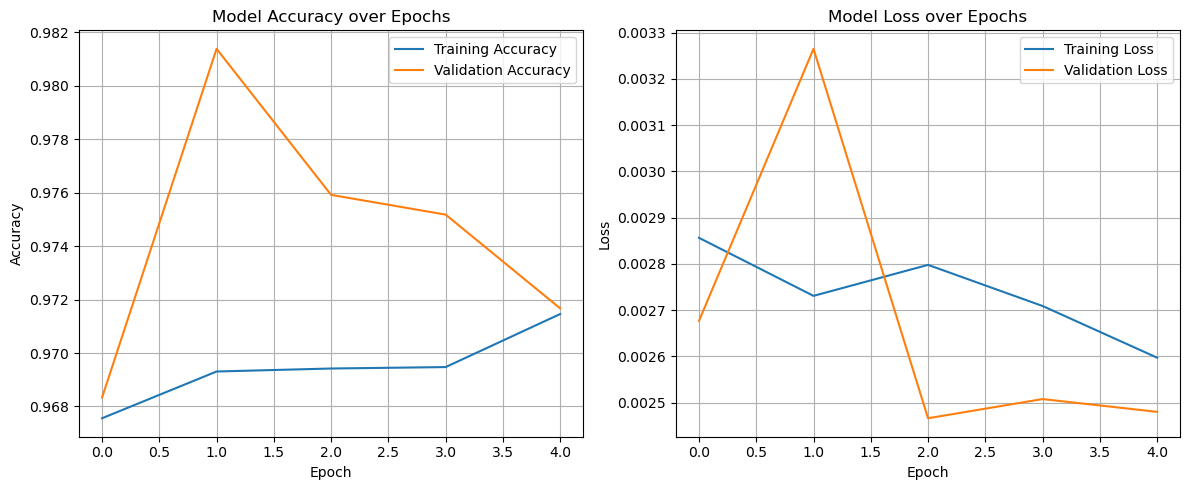

In [114]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Training - \[Phase 1.2\]

The model is trained for 10 more epochs on the filtered dataset. During this phase, random shapes are added to the input images to help the network learn the typical shapes of brain cells. This leads to some noticeable improvement.

In [119]:
generator.enableFeatures(True, False) # enable random shapes

history = model.fit(
    x=generator,
    epochs=10,
    validation_data=val_generator)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 581s 20s/step - acc: 0.9706 - loss: 0.0028 - val_acc: 0.9721 - val_loss: 0.0024
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 568s 20s/step - acc: 0.9689 - loss: 0.0029 - val_acc: 0.9731 - val_loss: 0.0023
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 549s 19s/step - acc: 0.9700 - loss: 0.0028 - val_acc: 0.9782 - val_loss: 0.0023
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 554s 19s/step - acc: 0.9713 - loss: 0.0027 - val_acc: 0.9798 - val_loss: 0.0028
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 551s 19s/step - acc: 0.9718 - loss: 0.0028 - val_acc: 0.9776 - val_loss: 0.0023
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 546s 19s/step - acc: 0.9717 - loss: 0.0027 - val_acc: 0.9792 - val_loss: 0.0024
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 555s 19s/step - acc: 0.9740 - loss: 0.0025 - val_acc: 0.9779 - val_loss: 0.0023
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 560s 19s/step - acc: 0.9724 - loss: 0.0026 - val_acc: 0.9784 - val_loss: 0.0024
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 571s 20s/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


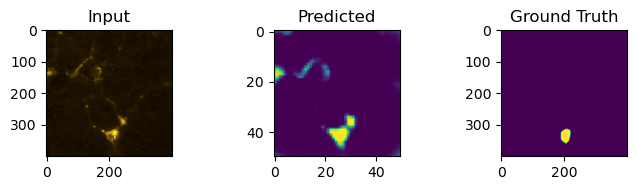

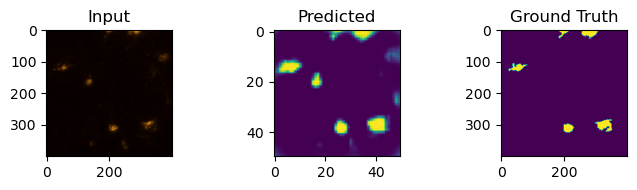

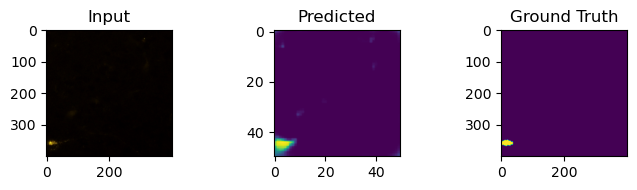

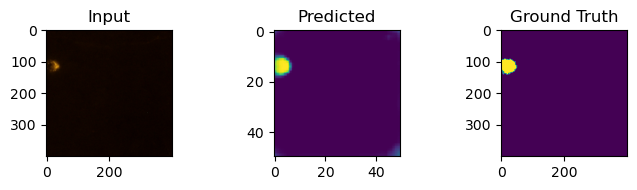

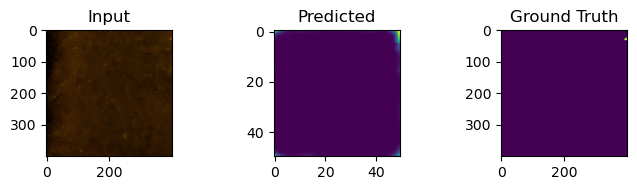

In [129]:
# second training images
def previewResults():
    testCases = np.array([np.array(img) for img in img_val_with_cells[:5]])
    testGroundTruth = mask_val_with_cells[:5]
    predictions = model.predict(testCases)

    for img, pred, actual in zip(testCases, predictions, testGroundTruth):
        fig, ax = plt.subplots(1, 3, figsize=(7,2))

        ax[0].imshow(img)
        ax[0].set_title('Input')
    
        ax[1].imshow(pred)
        ax[1].set_title('Predicted')

        ax[2].imshow(actual)
        ax[2].set_title('Ground Truth')

        plt.tight_layout()
        plt.show()

previewResults()

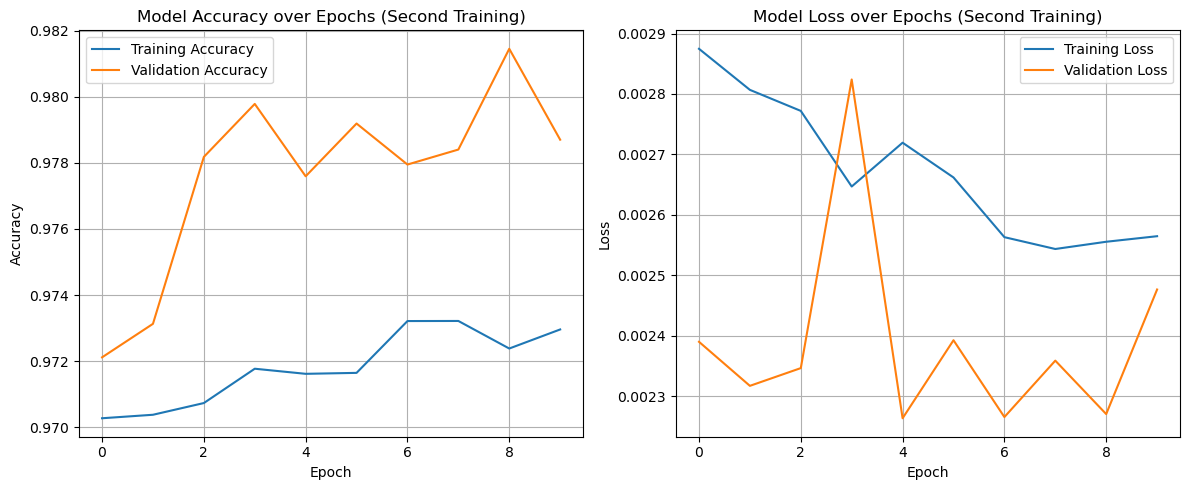

In [125]:
# second training
plt.figure(figsize=(12, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (Second Training)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs (Second Training)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Training - \[Phase 2\]

The model is trained for 5 epochs on the full training dataset, with all augmentations turned on (affine transformations and random shapes).

In [134]:
generator = ImageSequence(img_train, mask_train, batch_size, finalMaskSize) #use full image set
generator.enableFeatures(True, True) #Enable Random shapes + transforms

history = model.fit(
    x=generator,
    epochs=5,
    validation_data=val_generator)

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1679s 19s/step - acc: 0.9810 - loss: 0.0019 - val_acc: 0.9807 - val_loss: 0.0030
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1780s 20s/step - acc: 0.9905 - loss: 0.0010 - val_acc: 0.9864 - val_loss: 0.0035
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1832s 20s/step - acc: 0.9913 - loss: 9.7660e-04 - val_acc: 0.9830 - val_loss: 0.0027
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1833s 20s/step - acc: 0.9908 - loss: 0.0010 - val_acc: 0.9825 - val_loss: 0.0029
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1755s 20s/step - acc: 0.9909 - loss: 0.0010 - val_acc: 0.9844 - val_loss: 0.0030


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


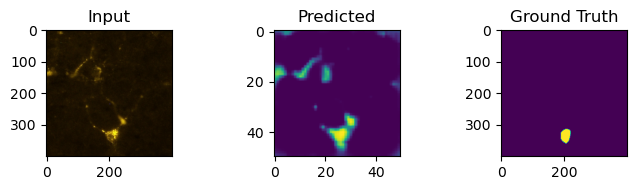

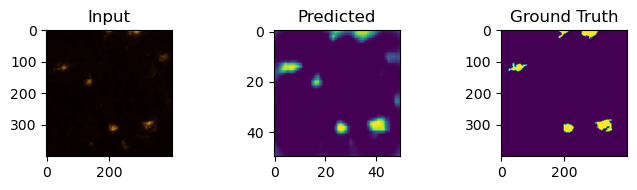

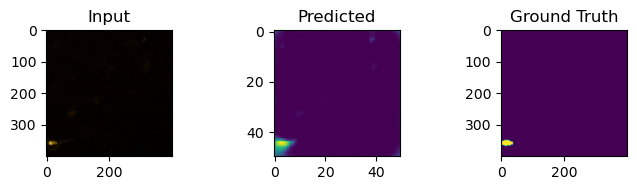

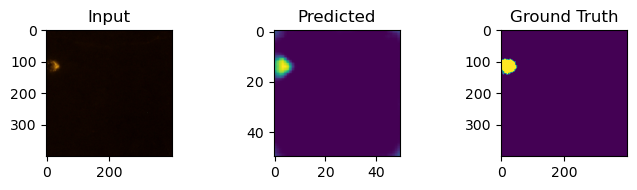

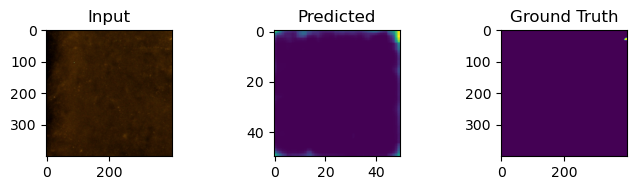

In [136]:
# third training images
def previewResults():
    testCases = np.array([np.array(img) for img in img_val_with_cells[:5]])
    testGroundTruth = mask_val_with_cells[:5]
    predictions = model.predict(testCases)

    for img, pred, actual in zip(testCases, predictions, testGroundTruth):
        fig, ax = plt.subplots(1, 3, figsize=(7,2))

        ax[0].imshow(img)
        ax[0].set_title('Input')
    
        ax[1].imshow(pred)
        ax[1].set_title('Predicted')

        ax[2].imshow(actual)
        ax[2].set_title('Ground Truth')

        plt.tight_layout()
        plt.show()

previewResults()

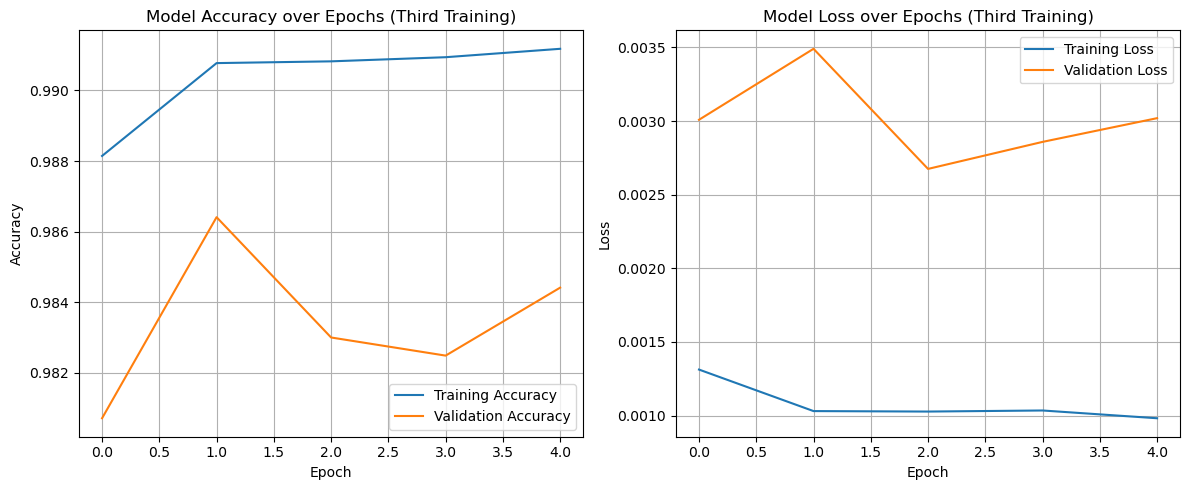

In [140]:
# third training
plt.figure(figsize=(12, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (Third Training)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs (Third Training)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Model Evaluation

All test sub-images are passed through the model to get predictions. A threshold of 0.5 is applied to turn the output into binary values (0 or 1). These predictions are then flattened and combined into a single 1-D array, which is used to generate evaluation metrics using SciPy's classification report.

In [197]:
#img_test, mask_test
predictions = model.predict(np.array([np.array(img) for img in img_test]))

18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step


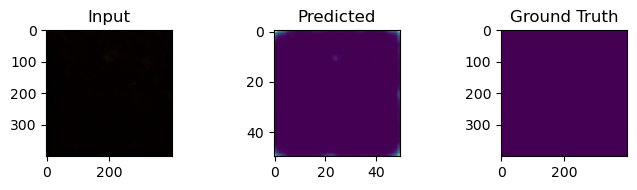

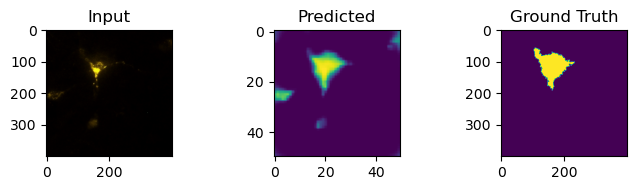

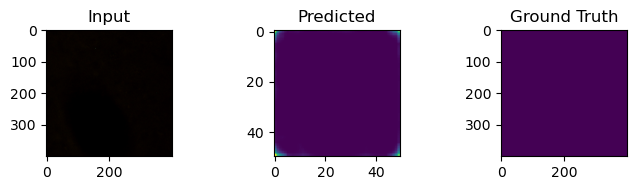

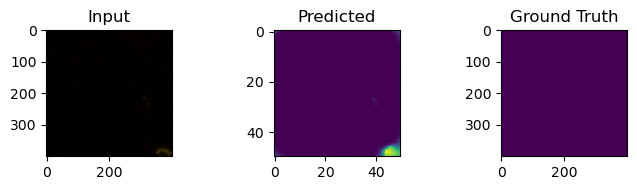

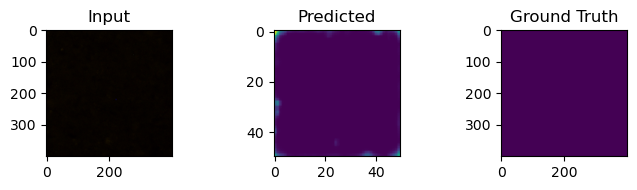

In [199]:
# prediction with test dataset
import itertools

for img, pred, actual in itertools.islice(zip(img_test, predictions, mask_test), 5):
    fig, ax = plt.subplots(1, 3, figsize=(7,2))
    ax[0].imshow(img)
    ax[0].set_title('Input')

    ax[1].imshow(pred)
    ax[1].set_title('Predicted')
    ax[2].imshow(actual)
    ax[2].set_title('Ground Truth')
    plt.tight_layout()
    plt.show()

In [217]:
#img_test, mask_test (with cells only)
predictions2 = model.predict(np.array([np.array(img) for img in img_test_with_cells]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


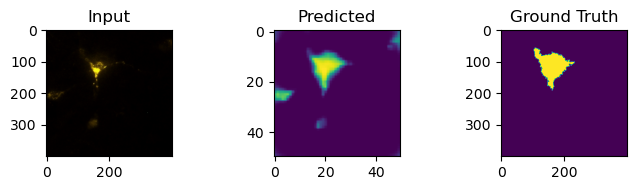

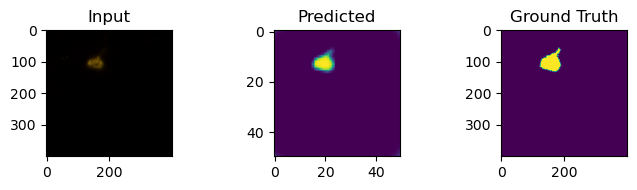

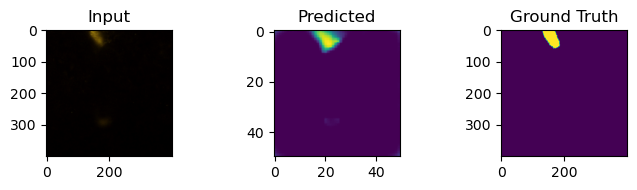

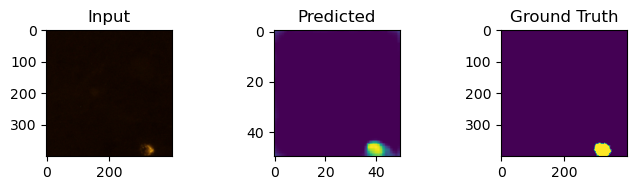

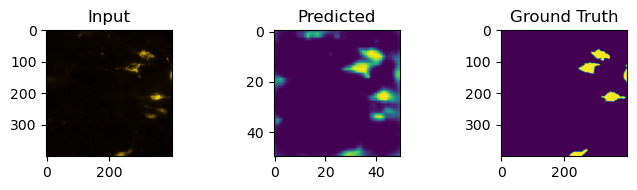

In [219]:
for img, pred, actual in itertools.islice(zip(img_test_with_cells, predictions2, mask_test_with_cells), 5):
    fig, ax = plt.subplots(1, 3, figsize=(7,2))
    ax[0].imshow(img)
    ax[0].set_title('Input')

    ax[1].imshow(pred)
    ax[1].set_title('Predicted')
    ax[2].imshow(actual)
    ax[2].set_title('Ground Truth')
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

   Non-Cells       1.00      0.99      1.00   1405519
       Cells       0.45      0.90      0.60      9481

    accuracy                           0.99   1415000
   macro avg       0.72      0.95      0.80   1415000
weighted avg       1.00      0.99      0.99   1415000



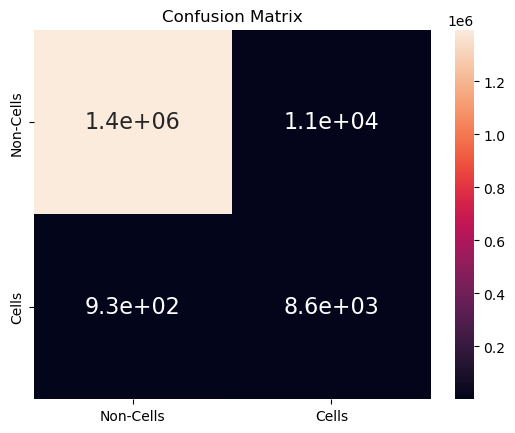

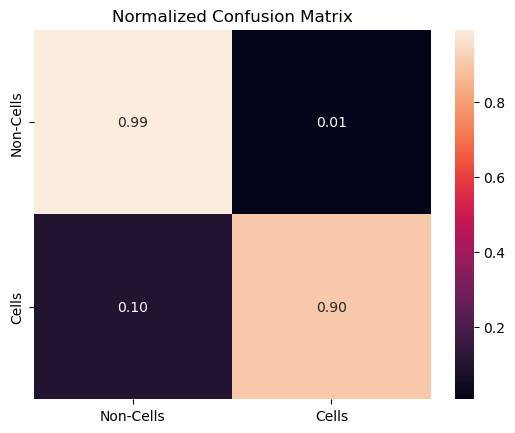

In [201]:
def computeMetrics(pred, groundTruthImages):
    actualList = []
    predList = []
    for p, groundTruth in zip(pred, groundTruthImages):
        resized = groundTruth.resize((finalMaskSize,finalMaskSize), Image.BILINEAR)
        resizedThreshold = np.array(resized, dtype=np.uint8) > 122 #0-255
        predThreshold = (p > 0.5).astype(np.uint8) #0-1
        actualList.append(np.reshape(resizedThreshold, -1))
        predList.append(np.reshape(predThreshold, -1))
    actual = np.concatenate((actualList), axis=0)
    predictions = np.concatenate((predList), axis=0)
    return (predictions, actual)

pred1D, actual1D = computeMetrics(predictions, mask_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

labels= ["Non-Cells", "Cells"]
print(classification_report(actual1D, pred1D, target_names=labels))
confusionMatrix = confusion_matrix(actual1D, pred1D)

df_cm = pd.DataFrame(confusionMatrix, index=labels, columns=labels)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}).set_title("Confusion Matrix") # font size
plt.show()

confMatrixNormalized = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
df_cm_norm = pd.DataFrame(confMatrixNormalized, index=labels, columns=labels)
sn.heatmap(df_cm_norm, annot=True, fmt=".2f")
plt.title("Normalized Confusion Matrix")
plt.show()

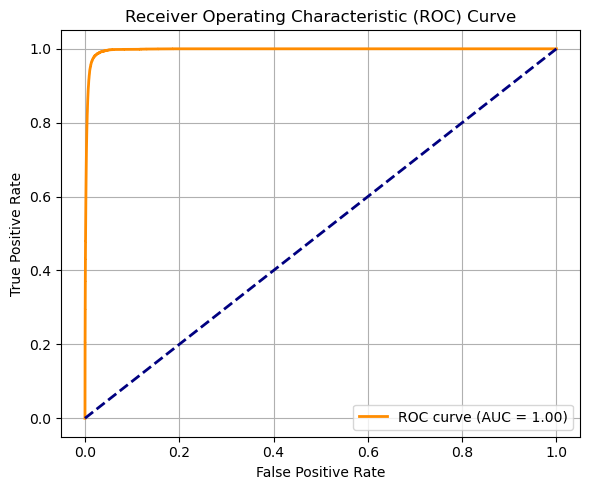

In [203]:
from sklearn.metrics import roc_curve, auc

def flattenPredictions(predictions, groundTruthImages):
    actualList = []
    predProbsList = []

    for pred, groundTruth in zip(predictions, groundTruthImages):
        # Resize ground truth to match prediction
        resized = groundTruth.resize((finalMaskSize, finalMaskSize), Image.BILINEAR)
        actualMask = (np.array(resized, dtype=np.uint8) > 122).astype(np.uint8)
        
        # Flatten
        actualList.append(actualMask.flatten())
        predProbsList.append(pred.flatten())  # Use raw probabilities, not thresholded

    actual = np.concatenate(actualList)
    predProbs = np.concatenate(predProbsList)

    return predProbs, actual

# Get raw prediction values and actual labels
predProbs1D, actual1D = flattenPredictions(predictions, mask_test)

# Compute ROC and AUC
fpr, tpr, _ = roc_curve(actual1D, predProbs1D)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

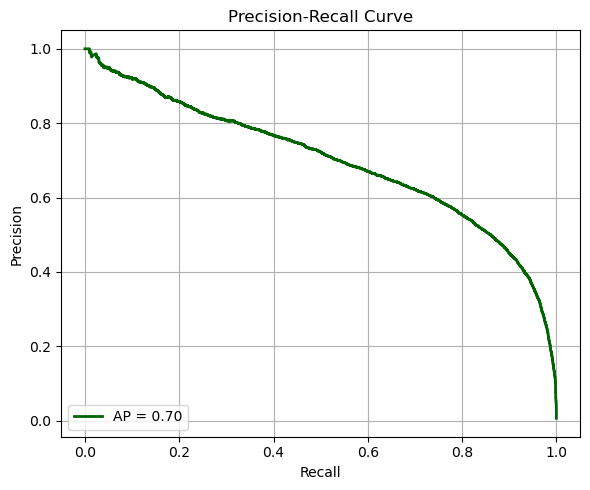

In [205]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# predProbs1D and actual1D should come from flattenPredictions()
precision, recall, _ = precision_recall_curve(actual1D, predProbs1D)
avg_precision = average_precision_score(actual1D, predProbs1D)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Application of the trained model to an image

With the trained model, full-size images can now be processed. Each image is first split into 400x400 pixel sub-images, which are passed through the model. The predicted masks are then resized back to 400x400 and stitched together into one full mask.

In areas where the sub-images overlap, a "minimum" blending method is used—this keeps the lower pixel value in overlapping regions. This gives a more cautious prediction, which is helpful given the model’s slight tendency for false positives.

An added benefit of this sub-image approach is that the model can be used on images of any size, as long as the cell sizes are similar to those seen during training.

In [222]:
# entire image
def applyModelToImage(pilImage, overlap=100):
    width, height = pilImage.size
    partitions = EvenlySpacedPartitions(width, height, 400, overlap)
    subImages = []#np arrays
    for partition in partitions:
        top, bot = (partition.y, partition.y + partition.height)
        left, right = (partition.x, partition.x + partition.width)
        croppedImg = pilImage.crop((left, top, right, bot))
        subImages.append(np.array(croppedImg))
    
    predictions = model.predict(np.array(subImages))
    predictionsUpscaled = []
    for pred in predictions:
        img = Image.fromarray(np.uint8(pred.reshape((50,50)) * 255))
        upscaled = np.array(img.resize((400,400)), dtype=np.uint8)
        predictionsUpscaled.append(upscaled)
    
    output = np.full((height, width), 255, dtype=np.uint8)
    for pred, location in zip(predictionsUpscaled, partitions):
        imgTop, imgBot = (round(location.y), round(location.y + location.height))
        imgLeft, imgRight = (round(location.x), round(location.x + location.width))
        output[imgTop:imgBot,imgLeft:imgRight] = np.minimum(output[imgTop:imgBot,imgLeft:imgRight], pred)
    
    return output

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


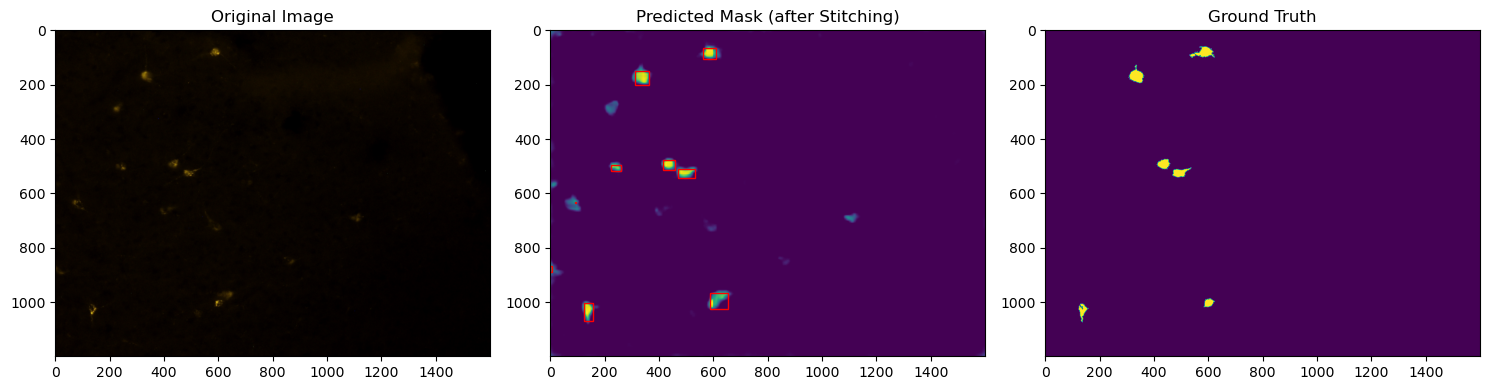

Number of cells (Intensity threshold=122): 9
 1) CellLocation(nPixels=1441, x=562, y=65, width=49, height=40)
 2) CellLocation(nPixels=2139, x=310, y=148, width=54, height=52)
 3) CellLocation(nPixels=1175, x=413, y=478, width=44, height=35)
 4) CellLocation(nPixels=647, x=224, y=494, width=36, height=25)
 5) CellLocation(nPixels=1449, x=470, y=510, width=62, height=35)
 6) CellLocation(nPixels=22, x=89, y=630, width=5, height=5)
 7) CellLocation(nPixels=107, x=0, y=868, width=7, height=20)
 8) CellLocation(nPixels=1910, x=586, y=965, width=68, height=59)
 9) CellLocation(nPixels=1406, x=122, y=1003, width=36, height=67)


In [224]:
idx = 15
stitchedMask = applyModelToImage(imgListRaw[idx], 100)

predictedCellLocations = markGroups(stitchedMask) 

fig, ax = plt.subplots(1, 3, figsize=(15,15))

ax[0].imshow(imgListRaw[idx])
ax[0].set_title('Original Image')

ax[1].imshow(stitchedMask)
ax[1].set_title('Predicted Mask (after Stitching)')
for cellLoc in predictedCellLocations:
    rect = patches.Rectangle((cellLoc.x, cellLoc.y), cellLoc.width, cellLoc.height, linewidth=1, edgecolor='r', facecolor='none')
    ax[1].add_patch(rect)

ax[2].imshow(maskListRaw[idx])
ax[2].set_title('Ground Truth')

plt.tight_layout()
plt.show()

print("Number of cells (Intensity threshold=122): {0}".format(len(predictedCellLocations)))
for idx, loc in enumerate(predictedCellLocations):
    print(" {0}) {1}".format(idx + 1, loc))

## **Next things to do:**
> use U-model + Dice loss function

> counting cells

> images of the models (FCN and U-model)

> improve the theoretical section

> discussion and conclusions